In [10]:
import pandas as pd
import seaborn as sns
import logging
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import dvc.api
import pickle

In [11]:

modelpkl = pickle.loads(
    dvc.api.read(
        path='model/model_trained/model.pkl',
        repo='https://github.com/fabioba/deploy_ml_api',
        mode='rb')
)

In [12]:
modelpkl

In [27]:

with dvc.api.open(
        path='data/census_clean.csv',
        repo='https://github.com/fabioba/deploy_ml_api') as fd:
        df=pd.read_csv(fd)
        print(df.head())


   age          workclass   fnlgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country salary  
0          2174             0              40   United-States  <=50K 

In [28]:
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [10]:
logger=logging.getLogger()

In [22]:
df=pd.read_csv('../data/census_clean.csv')
df.head()

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.shape

(32561, 15)

In [78]:
df.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [19]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

age


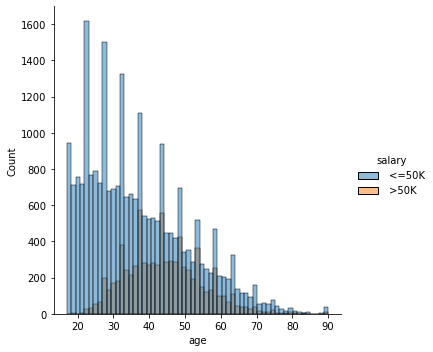

fnlgt


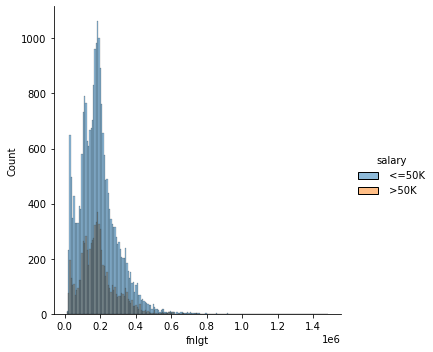

education-num


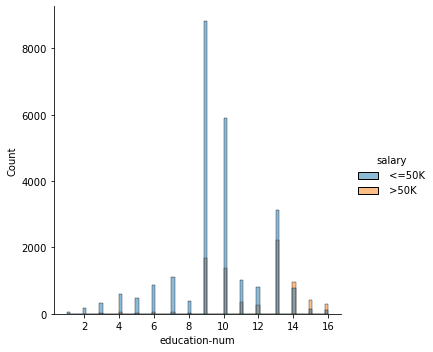

capital-gain


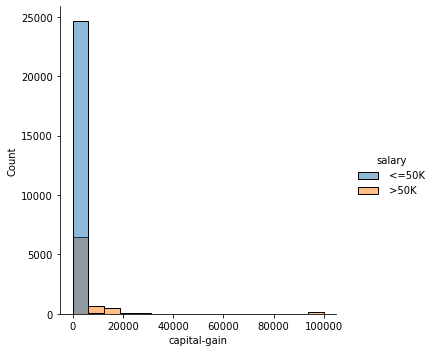

capital-loss


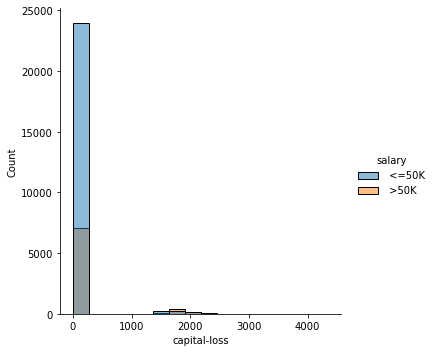

hours-per-week


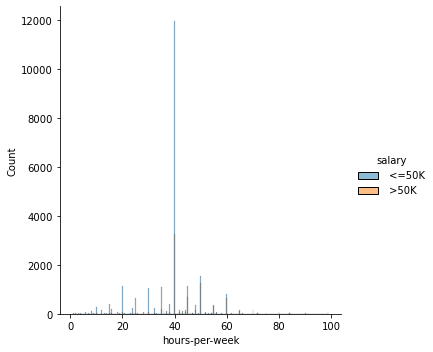

In [25]:
list_cols=['age','fnlgt','education-num','capital-gain','capital-loss','hours-per-week']

for col in list_cols:
    print(col)
    sns.displot(data=df,x=col,hue='salary')
    plt.show()

In [21]:
num_cols = set(list(df._get_numeric_data().columns))
all_cols=set(list(df.columns))
print(num_cols)
print(all_cols)
all_cols - num_cols

{'age', 'fnlgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'}
{'relationship', 'age', 'workclass', 'marital-status', 'native-country', 'fnlgt', 'education-num', 'sex', 'education', 'capital-gain', 'capital-loss', 'hours-per-week', 'occupation', 'salary', 'race'}


{'education',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'salary',
 'sex',
 'workclass'}

In [5]:
df[['capital-loss', 'age', 'hours-per-week', 'fnlgt', 'education-num', 'capital-gain']]=preprocessing.StandardScaler().fit_transform(df[['capital-loss', 'age', 'hours-per-week', 'fnlgt', 'education-num', 'capital-gain']].values)


In [6]:
df_preprocess = pd.get_dummies(df, columns =['capital-loss', 'education', 'relationship', 'age', 'native-country', 'workclass', 'capital-gain', 'marital-status', 'hours-per-week', 'fnlgt', 'education-num', 'occupation', 'sex', 'race'])

In [7]:
df_preprocess.columns

Index(['salary', 'capital-loss_-0.21665952703259014',
       'capital-loss_0.16799973467450735', 'capital-loss_0.3119367487326471',
       'capital-loss_0.5849207409118776', 'capital-loss_0.8231613159046606',
       'capital-loss_1.3343858830766742', 'capital-loss_1.403872717449569',
       'capital-loss_1.7934953244690162', 'capital-loss_1.9672124104012538',
       ...
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'sex_ Female', 'sex_ Male',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White'],
      dtype='object', length=22145)

In [8]:
df_preprocess['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
X=df_preprocess.drop(['salary'],axis=1).values
df_preprocess.loc[df_preprocess['salary']=='<=50K','salary']=0
df_preprocess.loc[df_preprocess['salary']=='>50K','salary']=1
y=df_preprocess['salary'].values
y=y.astype('int')
y

array([0, 0, 0, ..., 0, 0, 1])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [17]:
classifier = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)